## **EDA (Exploratory Data Analysis)- plataforma de videojuegos Steam**
Exploraremos los datos en busca de patrones, tendencias y relaciones significativas. 

Nuestro objetivo es comprender mejor la naturaleza de los datos, identificar posibles insights y preparar el terreno para análisis más profundos.

- Exploraremos los tres conjuntos de datos obtenidos de la plataforma Steam.

- Utilizaremos técnicas visuales y estadísticas descriptivas para examinar los datos.

- Buscaremos revelar información valiosa que pueda respaldar la toma de decisiones informadas y la formulación de hipótesis para futuras investigaciones.



#### **Nota: es necesario instalar las siguientes librerias dentro del entorno:**

`pip install pandas numpy matplotlib seaborn wordcloud`

In [23]:
# Importamos las librerias necesarias
import pandas as pd # Importamos pandas para el análisis de datos tabulares

import matplotlib.pyplot as plt # Para graficar

from wordcloud import WordCloud #Biblioteca para crear nubes de palabras en Python

import seaborn as sns # para graficar

import ast

In [24]:
# Cargamos los Datos

steam_games_df = pd.read_parquet('../Dataframes/Dataframes_limpios/steam_games_limpios.parquet')
user_items_df = pd.read_parquet('../Dataframes/Dataframes_limpios/user_items_limpios.parquet')
df_user_reviews = pd.read_parquet('../Dataframes/Dataframes_limpios/user_reviews_limpios.parquet')


df_idiomas =  pd.read_csv('../Dataframes/Dataframes_limpios/resumen_idiomas.csv')

In [25]:
# Damos un vistaso a la tabla reviews para ver si cargaron adecuadamente
df_user_reviews.head(3)

,item_id,recommend,year,sentiment_analysis
0,10,True,2011,2
1,10,True,2013,1
2,10,True,2014,2


---
## **Estadisticas Descriptivas**

In [26]:
#insights
df_user_reviews.describe(include='all') 

,item_id,recommend,year,sentiment_analysis
count,44444,44444,44444.0,44444.000000
unique,3411,2,<NA>,NaN
top,730,True,<NA>,NaN
freq,2502,38933,<NA>,NaN
mean,NaN,NaN,2014.25099,1.522028
std,NaN,NaN,0.827018,0.788896
min,NaN,NaN,2010.0,0.000000
25%,NaN,NaN,2014.0,1.000000
50%,NaN,NaN,2014.0,2.000000
75%,NaN,NaN,2015.0,2.000000


### ***# Analisis***

1. los archivos no cuentan con nulos. **(count)**

2. la columna recommended tiene 2 valores unicos [True-False] **(unique)**

3. En la columna recomended muestra que predomina en su catalogo los juegos recomendados que los NO recomendados **(top)**

4. El año promedio de las reviews capturadas fue el 2014 **(mean)**

5. La dispersión de las revisiones en cuanto al año de recopilación es de aproximadamente 0.82 años, lo que indica una baja variabilidad. **(std)**

6. el año en donde se tomo la primer review fue en el año 2010 **(min)**

7. el ultimo año en donde se tomo la ultima review fue en el año 2015 **(max)**


---
## **Analisis Cantidad de juegos en Steam 'Recomendados' y 'No Recomendados'**

In [27]:
#Tabla tota de recomendaciones en la platadorma stream

# Calcular conteo y porcentaje de recomendaciones
conteo_por_recomendaciones = df_user_reviews['recommend'].value_counts()
porcentaje_recomendaciones = (df_user_reviews['recommend'].value_counts(normalize=True) * 100).round(2)

# Crear DataFrame con el resumen de recomendaciones
resumen_recomendaciones = pd.DataFrame({
    'Recomendación': ['Recomendado', 'No Recomendado'],
    'Conteo': conteo_por_recomendaciones.values,
    'Porcentaje': porcentaje_recomendaciones.values
})

# Ordenar el DataFrame por conteo de mayor a menor
resumen_recomendaciones = resumen_recomendaciones.sort_values(by='Conteo', ascending=False)

# Mostrar DataFrame organizado
resumen_recomendaciones

# Imprimir el conteo de valores True y False
#print("Cantidad de juegos en Steam 'Recomendados':", conteo_recomendados[True])
# print("Cantidad de juegos en Steam 'No Recomendados ':", conteo_recomendados[False])

,Recomendación,Conteo,Porcentaje
0,Recomendado,38933,87.6
1,No Recomendado,5511,12.4


### **# Insights** 
**Desbalance en las recomendaciones:**
- El 87.59% de las recomendaciones están marcadas como verdaderas, mientras que solo el 12.41% son falsas.

- Este desbalance puede afectar la capacidad del modelo para aprender patrones en las recomendaciones negativas debido a la falta de ejemplos.

**Impacto en el modelo:**
- En situaciones de desbalance, algunos algoritmos pueden tener dificultades para aprender patrones en la clase minoritaria.

**Relevancia de las recomendaciones positivas:**
- Dada la alta proporción de recomendaciones positivas, es importante considerar si esto refleja fielmente la naturaleza de las reseñas de usuarios en la plataforma o si hay sesgos en la recopilación de datos.

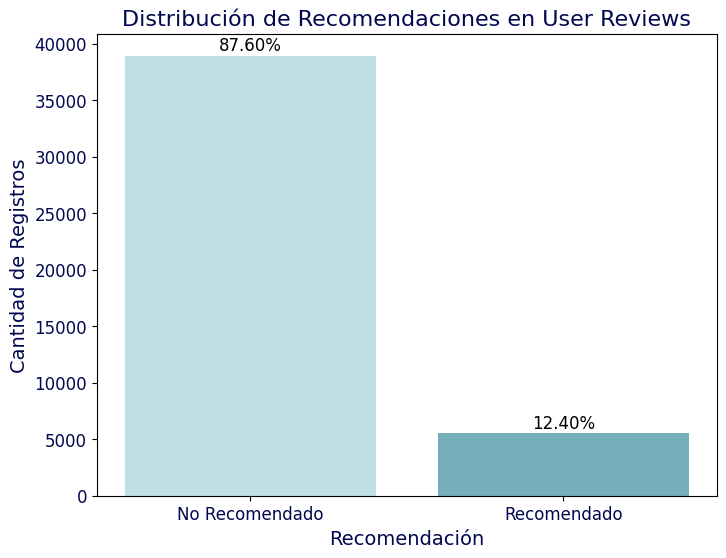

In [28]:
#
# Calcular el total de registros
total_records = resumen_recomendaciones['Conteo'].sum()

# Calcular los porcentajes
porcentajes = (resumen_recomendaciones['Conteo'] / total_records) * 100

# Colores personalizados
colors = ['#b0d7e1', '#549aab']

# Convertir el índice a una lista de cadenas 'Recomendado' y 'No Recomendado'
x_values = ['Recomendado' if value else 'No Recomendado' for value in resumen_recomendaciones.index]

# Crear un gráfico de barras para visualizar las recomendaciones
plt.figure(figsize=(8, 6))
bars = plt.bar(x_values, resumen_recomendaciones['Conteo'], color=colors, alpha=0.8)

# Mostrar los porcentajes encima de las barras
for bar, percentage in zip(bars, porcentajes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

# Configuración del título y ejes
plt.title('Distribución de Recomendaciones en User Reviews', fontsize=16, color='#01084f')
plt.xlabel('Recomendación', fontsize=14, color='#01084f')
plt.ylabel('Cantidad de Registros', fontsize=14, color='#01084f')
plt.xticks(fontsize=12, color='#01084f')
plt.yticks(fontsize=12, color='#01084f')

# Quitar las líneas de la cuadrícula
plt.grid(False)

# Mostrar el gráfico
plt.show()


---
## **Analisis de los ***Tipos de Genero*** en la Plataforma Stream**


Podemos visualizar la distribucion de las diferentes categorias que hay dentro del repertorio de stream

In [29]:
#Informe
#Creamos una copia y borramos columnas irrelevantes
df_game = steam_games_df.drop(['name', 'developer', 'price', 'tags','specs','year'],axis=1)

# Borramos nulos
df_game.dropna(inplace=True)

# Convertimos la columna genres a tipo lista con el modulo ast.
#df_game['genres'] = df_game['genres'].apply(ast.literal_eval)

# Expandimos las listas en columnas
df_game = df_game.explode('genres').reset_index(drop=True)

# Contar la frecuencia de cada género
genre_counts = df_game['genres'].value_counts()

# Calcular el porcentaje de cada género respecto al total
total_records = len(df_game)
genre_percentages = (genre_counts / total_records) * 100

# Crear el DataFrame con la frecuencia y los porcentajes
genre_data = pd.DataFrame({'Frecuencia': genre_counts, 'Porcentaje': genre_percentages})

In [30]:
#Tabla de generos y su relevancia en el conjunto de datos



# Mostrar el DataFrame con la frecuencia y los porcentajes
genre_data

,Frecuencia,Porcentaje
genres,,
Indie,15858,22.162903
Action,11320,15.820662
Casual,8282,11.574799
Adventure,8242,11.518895
Strategy,6957,9.722999
Simulation,6699,9.362422
RPG,5479,7.657368
Free to Play,2031,2.838495
Early Access,1462,2.043269


---
## **Analisis del ***tiempo*** en relacion a las reviews**

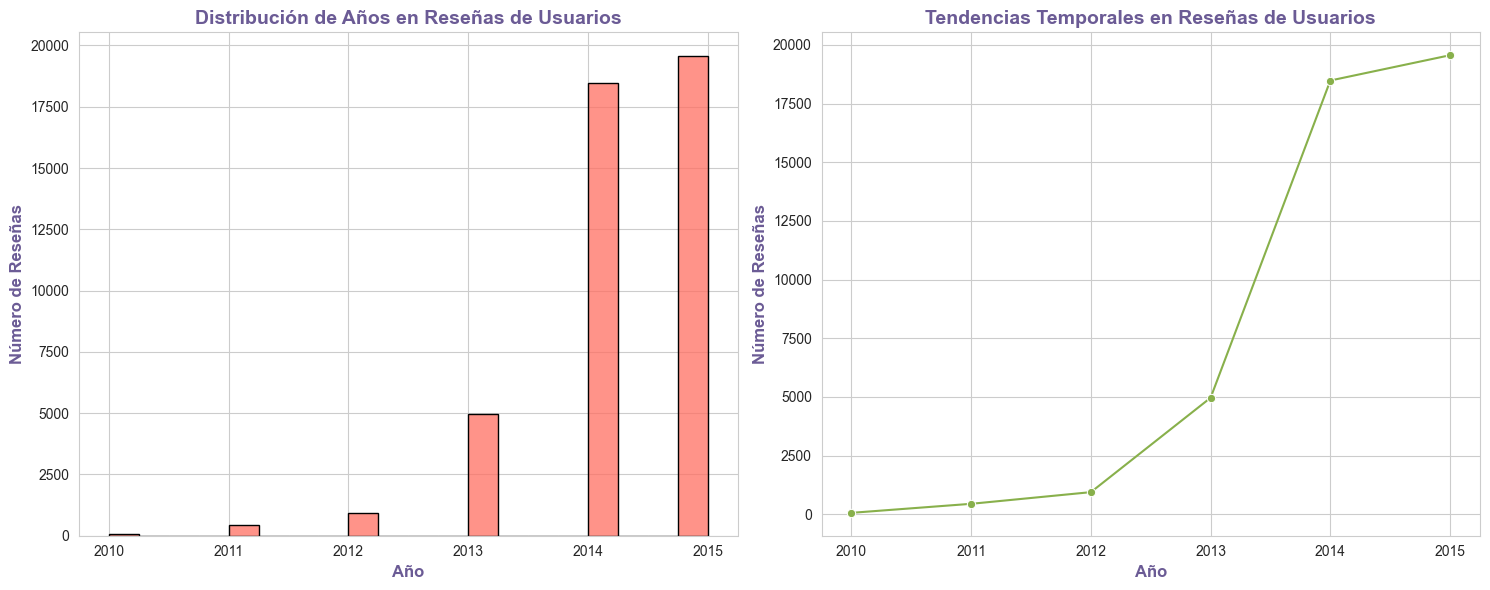

In [31]:
# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Colores personalizados
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

# Crear subplots con Seaborn
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de la distribución de años
sns.histplot(df_user_reviews['year'], bins=20, color=colors[0], edgecolor='black', ax=axs[0])
axs[0].set_title('Distribución de Años en Reseñas de Usuarios', fontsize=14, fontweight='bold', color=colors[1])
axs[0].set_xlabel('Año', fontsize=12, fontweight='bold', color=colors[1])
axs[0].set_ylabel('Número de Reseñas', fontsize=12, fontweight='bold', color=colors[1])

# Gráfico de líneas para mostrar tendencias temporales
trends = df_user_reviews['year'].value_counts().sort_index()
sns.lineplot(x=trends.index, y=trends.values, marker='o', color=colors[2], ax=axs[1])
axs[1].set_title('Tendencias Temporales en Reseñas de Usuarios', fontsize=14, fontweight='bold', color=colors[1])
axs[1].set_xlabel('Año', fontsize=12, fontweight='bold', color=colors[1])
axs[1].set_ylabel('Número de Reseñas', fontsize=12, fontweight='bold', color=colors[1])

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### **# Insights** 

**Histograma de Distribución de Años**:
  - La mayoría de las reseñas se concentran en los años más recientes, especialmente en 2014 y 2015, con una cantidad menor en 2013.

  - El año 2010 muestra la menor cantidad de reseñas, lo que sugiere un aumento significativo en la participación de usuarios con el tiempo.
  
**Gráfico de Líneas de Tendencias Temporales**:
  - La tendencia temporal revela un crecimiento constante en el número de reseñas a lo largo de los años.

  - La línea alcanza su punto máximo en 2015, indicando un pico en la actividad de reseñas en ese año.


***Conclusion:***
  - La consideración de la variable temporal es crucial al desarrollar un modelo de recomendación, dado que las preferencias de los usuarios pueden cambiar con el tiempo.

  - La concentración en años específicos puede reflejar períodos de lanzamiento de juegos populares o modificaciones en la plataforma que impactan la actividad de reseñas.

  - En resumen, estos descubrimientos ofrecen una base sólida para el desarrollo del modelo de recomendación, destacando la necesidad de ajustarse a las tendencias cambiantes para proporcionar sugerencias precisas y relevantes a los usuarios de Steam.

---
## ***Analisis de Sentimientos*** **en Relacion a las Reviews**

**Contexto**: 
  - La columna 'reviews' contiene reseñas de juegos hechas por usuarios.

  - El objetivo es mejorar el rendimiento del modelo de Machine Learning.

**Feature Engineering**: 
  - Se creó una nueva característica para mejorar el rendimiento futuro del modelo de Machine Learning.

**Análisis de la columna 'reviews'**:
  - Se realizó un análisis para obtener estadísticas sobre la cantidad de reseñas por lenguaje.

  - Este análisis es crucial para determinar cómo proceder con el análisis de sentimientos.

**Determinación del proceso de análisis de sentimiento**:
  - Basado en las estadísticas obtenidas del análisis de la columna 'reviews'.

  - Determina si se aplicará el análisis de sentimientos en todo el conjunto de datos o si se aplicará un filtro por idioma específico.

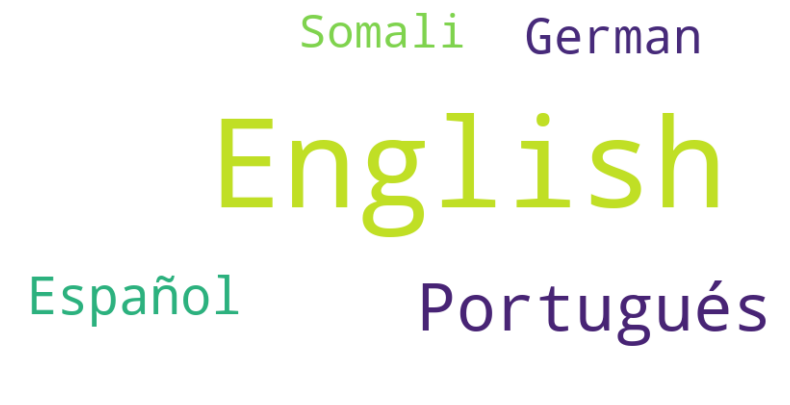

In [32]:
# Nube de frecuencia en los idiomas usados en las reviews

# Crearemos un diccionario con los datos del DataFrame
df_idiomas_dict = dict(zip(df_idiomas['Idioma'], df_idiomas['Conteo']))

# Colores personalizados
colores = ['aquamarine', 'lime', 'coral', 'violet', 'goldenrod']

# Crear la nube de palabras con colores personalizados
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(df_idiomas_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Con base en los resultados obtenidos, opté por llevar a cabo el análisis de sentimiento exclusivamente en los registros escritos en inglés. Esta decisión se fundamenta en diversos factores que se explican de manera clara:

1. **Mejor Reflejo de la Realidad**:
   - El inglés abarca más del 70% de los datos, garantizamos un análisis de sentimiento más fiel a las opiniones predominantes en nuestro conjunto de datos. 
  
   - Nos facilita comprender las tendencias de opinión dentro de nuestra audiencia principal.

2. **Exactitud del Modelo**:
   - Los modelos de análisis de sentimiento suelen estar más afinados y adaptados al inglés, al ser uno de los idiomas mejor comprendidos y estudiados. 

   - Este enfoque puede contribuir a mejorar la exactitud de los resultados obtenidos en el análisis.

3. **Optimización del Proceso Computacional**:
   - Al reducir el conjunto de datos únicamente a los registros en inglés, podemos mejorar la eficiencia de los procesos computacionales.

   - Estaremos trabajando con un conjunto de datos más reducido. 

   - Esta optimización puede traducirse en tiempos de procesamiento más cortos y en un uso más eficiente de los recursos disponibles.

---
## **Analisis de sentimientos en la plataforma Steam:**


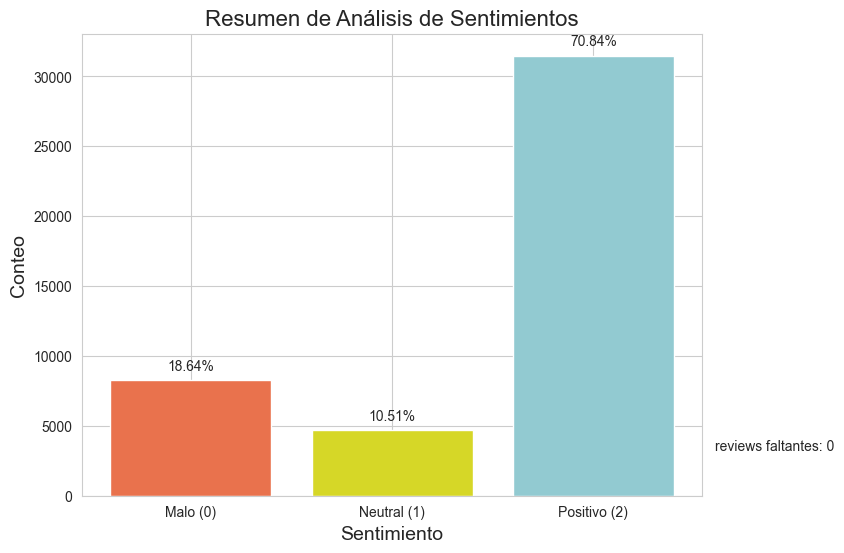

In [33]:
# Calcular el resumen de análisis de sentimientos
sentiment_summary = df_user_reviews['sentiment_analysis'].value_counts()
percentage_summary = (df_user_reviews['sentiment_analysis'].value_counts(normalize=True) * 100).round(2)

# Crear un nuevo DataFrame con el resumen
resumen_sentimientos = pd.DataFrame({
    'Conteo': sentiment_summary,
    'Porcentaje': percentage_summary.astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_sentimientos = resumen_sentimientos.sort_index()

# Configurar los colores
colors = ['#e9724d', '#d6d727', '#92cad1']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(resumen_sentimientos.index, resumen_sentimientos['Conteo'], color=colors)

# Mostrar porcentajes encima de las barras
for bar, percentage in zip(bars, resumen_sentimientos['Porcentaje']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f"{percentage}", ha='center', va='bottom')

# Configurar el gráfico
plt.title('Resumen de Análisis de Sentimientos', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Conteo', fontsize=14)
plt.xticks(range(len(resumen_sentimientos)), ['Malo (0)', 'Neutral (1)', 'Positivo (2)'])
plt.tick_params(axis='x', labelrotation=0)

# Mostrar el conteo de reviews en blanco
conteo_reviews_en_blanco = (df_user_reviews['sentiment_analysis'].isnull()).sum()
plt.text(2.9, 3000, f"reviews faltantes: {conteo_reviews_en_blanco}", ha='center', va='bottom')

plt.show()

En el análisis de las opiniones en la columna 'sentiment_analysis', podemos destacar lo siguiente:

- **Positivo (2):** Este segmento predomina en las opiniones, representando el 70.83% del total. Es evidente que la mayoría de las reseñas reflejan una experiencia positiva por parte de los usuarios.

- **Neutral (1):** Aunque menos común, un 10.53% de las opiniones se clasifican como neutrales. Esto sugiere que algunos usuarios comparten sus impresiones sin un claro sesgo hacia lo positivo o negativo.

- **Negativo (0):** La categoría de sentimiento negativo presenta una presencia más modesta, constituyendo el 18.63% del total. Esto insinúa que, en general, la plataforma recibe reseñas mayoritariamente positivas por parte de los usuarios.

**Conclusion:**
La tendencia general muestra que la mayoría de los usuarios expresan opiniones favorables en sus reseñas. Además, la proporción de reseñas neutrales es relativamente baja, lo que sugiere que la mayoría de los usuarios tiende a emitir opiniones claramente positivas o negativas.

---
## **Eleccion del metodo para el Análisis de Sentimientos con NLTK y Vader:**


**Elección del Método**:
  - Utilizamos el analizador de sentimientos de Vader junto con la biblioteca NLTK para evaluar las reseñas.

  - Este método nos proporciona una puntuación compuesta que clasifica las reseñas en negativas como '0', neutrales como '1' o positivas como '2'.

**Justificación de la Elección**:
  - **Eficiencia Computacional**:
    - Vader es conocido por su eficiencia en el procesamiento de grandes volúmenes de datos, lo que es fundamental para nuestro análisis.

  - **Facilidad de Implementación**:
    - NLTK (Natural Language Toolkit) es ampliamente utilizada y su integración con Vader es sencilla, lo que nos permite implementar el análisis de sentimientos de manera rápida y sin complicaciones.

  - **Puntuación Compuesta**:
    - La puntuación compuesta proporcionada por Vader nos ofrece una medida clara y fácil de interpretar de la polaridad de las reseñas.

  - **Precisión Aceptable**:
    - Aunque ningún método es perfecto, Vader ofrece resultados aceptables en una amplia gama de situaciones, lo que lo hace adecuado para nuestras necesidades.

**Consideraciones Adicionales**:
  - Es importante tener en cuenta que la precisión del análisis puede verse influenciada por el contexto del conjunto de datos y el idioma utilizado en las reseñas.

  - Si la precisión es una preocupación, podríamos considerar enfoques más avanzados en fases posteriores del proyecto, como modelos de aprendizaje profundo.

**Conclusion**:
  - Elegimos NLTK y Vader debido a su eficiencia, facilidad de implementación, capacidad para proporcionar una puntuación compuesta clara y aceptable precisión para nuestro análisis de sentimientos en este contexto particular.